<a href="https://colab.research.google.com/github/dzakwanilhakim/brainstorm_automation/blob/main/21124026_Dzakwanil_Hakim_Tugas_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dzakwanil Hakim <br> 21124026

## Data Preprocessing

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv', sep = ",")
data


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


Tahapan preprocessing: <br>
- Check NA, jika numerik gunakan KNN,

In [ ]:
# Check NA for all column in percentage 2 point decimal
data.isna().sum()/len(data)*100

,0
id,0.000000
gender,0.000000
age,0.000000
hypertension,0.000000
heart_disease,0.000000
ever_married,0.000000
work_type,0.000000
Residence_type,0.000000
avg_glucose_level,0.000000
bmi,3.933464


In [ ]:
# NA data imputation for BMI with KNN
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
data['bmi'] = imputer.fit_transform(data[['bmi']])
data.isna().sum()/len(data)*100

,0
id,0.0
gender,0.0
age,0.0
hypertension,0.0
heart_disease,0.0
ever_married,0.0
work_type,0.0
Residence_type,0.0
avg_glucose_level,0.0
bmi,0.0


sudah tidak terdapat NA pada kolom BMI

In [ ]:
# make data2 with copy.deepcopy()
import copy
data2 = copy.deepcopy(data)
data2

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [ ]:
# column check for categorical variable
data2.dtypes

,0
id,int64
gender,object
age,float64
hypertension,int64
heart_disease,int64
ever_married,object
work_type,object
Residence_type,object
avg_glucose_level,float64
bmi,float64


In [ ]:
#print unique value just for categorical column
for column in data2.columns:
    if data2[column].dtype == object:
        print(f'{column}: {data2[column].unique()}')

gender: ['Male' 'Female']
ever_married: ['Yes' 'No']
work_type: ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type: ['Urban' 'Rural']
smoking_status: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [ ]:
# count unique value in smoking status
data2['smoking_status'].value_counts()/len(data2)*100

,count
smoking_status,
never smoked,37.025440
Unknown,30.215264
formerly smoked,17.318982
smokes,15.440313


In [ ]:
# drop smoking status column
data2 = data2.drop(columns=['smoking_status'])

In [ ]:
#label encoding: male: 0, female: 1
data2['gender'] = data2['gender'].map({'Male': 0, 'Female': 1})
data2['ever_married'] = data2['ever_married'].map({'No': 0, 'Yes': 1})
data2['Residence_type'] = data2['Residence_type'].map({'Rural': 0, 'Urban': 1})


In [ ]:
#checkpoint
data3 = copy.deepcopy(data2)
data3

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke
0,9046,0,67.0,0,1,1,Private,1,228.69,36.600000,1
1,51676,1,61.0,0,0,1,Self-employed,0,202.21,28.893237,1
2,31112,0,80.0,0,1,1,Private,0,105.92,32.500000,1
3,60182,1,49.0,0,0,1,Private,1,171.23,34.400000,1
4,1665,1,79.0,1,0,1,Self-employed,0,174.12,24.000000,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,1,80.0,1,0,1,Private,1,83.75,28.893237,0
5106,44873,1,81.0,0,0,1,Self-employed,1,125.20,40.000000,0
5107,19723,1,35.0,0,0,1,Self-employed,0,82.99,30.600000,0
5108,37544,0,51.0,0,0,1,Private,0,166.29,25.600000,0


In [ ]:
# Transform data2[work_type] to one hot encoding
data3 = pd.get_dummies(data3, columns=['work_type'])
data3



,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,9046,0,67.0,0,1,1,1,228.69,36.600000,1,False,False,True,False,False
1,51676,1,61.0,0,0,1,0,202.21,28.893237,1,False,False,False,True,False
2,31112,0,80.0,0,1,1,0,105.92,32.500000,1,False,False,True,False,False
3,60182,1,49.0,0,0,1,1,171.23,34.400000,1,False,False,True,False,False
4,1665,1,79.0,1,0,1,0,174.12,24.000000,1,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,1,80.0,1,0,1,1,83.75,28.893237,0,False,False,True,False,False
5106,44873,1,81.0,0,0,1,1,125.20,40.000000,0,False,False,False,True,False
5107,19723,1,35.0,0,0,1,0,82.99,30.600000,0,False,False,False,True,False
5108,37544,0,51.0,0,0,1,0,166.29,25.600000,0,False,False,True,False,False


In [ ]:
# Convert False to 0 True to 1
boolean_cols = data3.select_dtypes(include='bool').columns
data3[boolean_cols] = data3[boolean_cols].astype(int)
data3

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,9046,0,67.0,0,1,1,1,228.69,36.600000,1,0,0,1,0,0
1,51676,1,61.0,0,0,1,0,202.21,28.893237,1,0,0,0,1,0
2,31112,0,80.0,0,1,1,0,105.92,32.500000,1,0,0,1,0,0
3,60182,1,49.0,0,0,1,1,171.23,34.400000,1,0,0,1,0,0
4,1665,1,79.0,1,0,1,0,174.12,24.000000,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,1,80.0,1,0,1,1,83.75,28.893237,0,0,0,1,0,0
5106,44873,1,81.0,0,0,1,1,125.20,40.000000,0,0,0,0,1,0
5107,19723,1,35.0,0,0,1,0,82.99,30.600000,0,0,0,0,1,0
5108,37544,0,51.0,0,0,1,0,166.29,25.600000,0,0,0,1,0,0


In [ ]:
data3.dtypes

,0
id,int64
gender,int64
age,float64
hypertension,int64
heart_disease,int64
ever_married,int64
Residence_type,int64
avg_glucose_level,float64
bmi,float64
stroke,int64


In [ ]:
data_clean = copy.deepcopy(data3)

## Feature Selection

In [ ]:
corr_matrix = data_clean.corr()
corr_with_label = corr_matrix['stroke'].drop('stroke').abs()
corr_with_label.sort_values(ascending=False)

,stroke
age,0.245257
heart_disease,0.134914
avg_glucose_level,0.131945
hypertension,0.127904
ever_married,0.108340
work_type_children,0.083869
work_type_Self-employed,0.062168
bmi,0.038947
Residence_type,0.015458
work_type_Never_worked,0.014882


In [ ]:
# select feature with corr >= 0.1
selected_features = corr_with_label[corr_with_label >= 0.1].index
# filter column + stroke status
selected_features = selected_features.tolist() + ['stroke']
data_selected = data_clean[selected_features]
data_selected

,age,hypertension,heart_disease,ever_married,avg_glucose_level,stroke
0,67.0,0,1,1,228.69,1
1,61.0,0,0,1,202.21,1
2,80.0,0,1,1,105.92,1
3,49.0,0,0,1,171.23,1
4,79.0,1,0,1,174.12,1
...,...,...,...,...,...,...
5105,80.0,1,0,1,83.75,0
5106,81.0,0,0,1,125.20,0
5107,35.0,0,0,1,82.99,0
5108,51.0,0,0,1,166.29,0


In [ ]:
#count for stroke
data_selected['stroke'].value_counts()/len(data_selected)*100


,count
stroke,
0,95.127202
1,4.872798


In [ ]:

# count for heart disease
data_selected['heart_disease'].value_counts()/len(data_selected)*100


,count
heart_disease,
0,94.598826
1,5.401174


In [ ]:

# count for hypertension
data_selected['hypertension'].value_counts()/len(data_selected)*100

,count
hypertension,
0,90.254403
1,9.745597


In [ ]:
# undersampling based on stroke
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
x_rus, y_rus = rus.fit_resample(data_selected.drop(columns=['stroke']), data_selected['stroke'])

#count for stroke proporsion
y_rus.value_counts()

,count
stroke,
0,249
1,249


In [ ]:
# data splitting from x rus y rus
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_rus, y_rus, test_size=0.2, random_state=42)



In [ ]:
# min max normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [ ]:
x_train

array([[0.92661448, 0.        , 0.        , 1.        , 0.25086882],
       [0.62084149, 0.        , 0.        , 1.        , 0.31078263],
       [0.51076321, 0.        , 0.        , 1.        , 0.12733423],
       ...,
       [0.84099804, 0.        , 0.        , 1.        , 0.12455401],
       [0.76761252, 0.        , 1.        , 1.        , 0.28154395],
       [0.15606654, 0.        , 0.        , 0.        , 0.09230342]])

In [ ]:
# Get the indices of the undersampled data
undersampled_indices = data_selected.index.isin(rus.sample_indices_)

# Select the data that was not undersampled (inverse of the undersampled indices)
x_test2 = data_selected.loc[~undersampled_indices].drop(columns=['stroke'])
y_test2 = data_selected.loc[~undersampled_indices]['stroke']

# Verify the counts for stroke proportion in the new test set
y_test2.value_counts()


,count
stroke,
0,4612


In [ ]:
x_test2 = scaler.transform(x_test2)
x_test2

array([[0.03375734, 0.        , 0.        , 0.        , 0.18159492],
       [0.70645793, 1.        , 0.        , 1.        , 0.14841759],
       [0.09491194, 0.        , 0.        , 0.        , 0.25466846],
       ...,
       [0.98776908, 0.        , 0.        , 1.        , 0.32097679],
       [0.62084149, 0.        , 0.        , 1.        , 0.51137575],
       [0.53522505, 0.        , 0.        , 1.        , 0.13599926]])

## KNN

In [ ]:
# accuracy function

from sklearn.metrics import accuracy_score

def evaluate_model(model, x_train = x_train, y_train = y_train, x_test = x_test, y_test = y_test, x_test2 = x_test2, y_test2 = y_test2):
    # Train accuracy
    y_pred_train = model.predict(x_train)
    accuracy_train = accuracy_score(y_train, y_pred_train)

    # Test accuracy
    y_pred_test = model.predict(x_test)
    accuracy_test = accuracy_score(y_test, y_pred_test)

    # Test2 accuracy
    y_pred_test2 = model.predict(x_test2)
    accuracy_test2 = accuracy_score(y_test2, y_pred_test2)

    # Print results
    print("Train accuracy: {:.2f}%".format(accuracy_train * 100))
    print("Test accuracy: {:.2f}%".format(accuracy_test * 100))
    print("Test2 accuracy: {:.2f}%".format(accuracy_test2 * 100))

# Example usage:
# evaluate_model(rf_model, x_train, y_train, x_test, y_test, x_test2, y_test2)


In [ ]:
# confusion matrix function

import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, x_test=x_test, y_test=y_test, labels=['Normal (0)', 'Stroke (1)']):
    # Predict on the test set
    y_pred = model.predict(x_test)

    # Generate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot the confusion matrix with a red color scheme and custom labels
    plt.figure(figsize=(3,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False, xticklabels=labels, yticklabels=labels)
    plt.title(f'Confusion Matrix for {type(model).__name__}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Example usage:
# plot_confusion_matrix(knn, x_test, y_test)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN classifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

# Evaluate the model
evaluate_model(knn)


Train accuracy: 81.66%
Test accuracy: 74.00%
Test2 accuracy: 72.48%


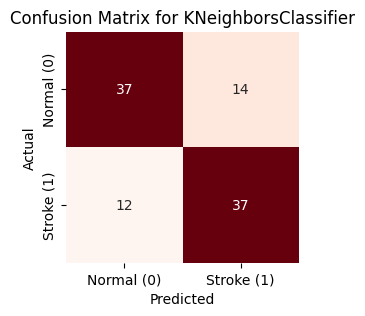

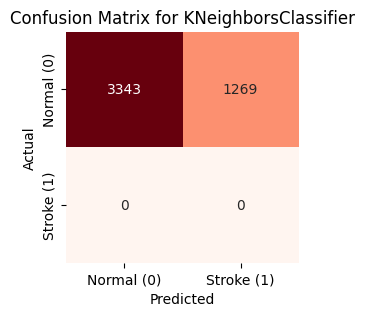

In [ ]:
plot_confusion_matrix(knn)
plot_confusion_matrix(knn, x_test=x_test2, y_test=y_test2)

## SVM

In [ ]:
from sklearn.svm import SVC
svm_rbf = SVC(C = 1, kernel="rbf", gamma = 1)
svm_rbf.fit(x_train, y_train)
evaluate_model(svm_rbf)


Train accuracy: 76.88%
Test accuracy: 72.00%
Test2 accuracy: 70.77%


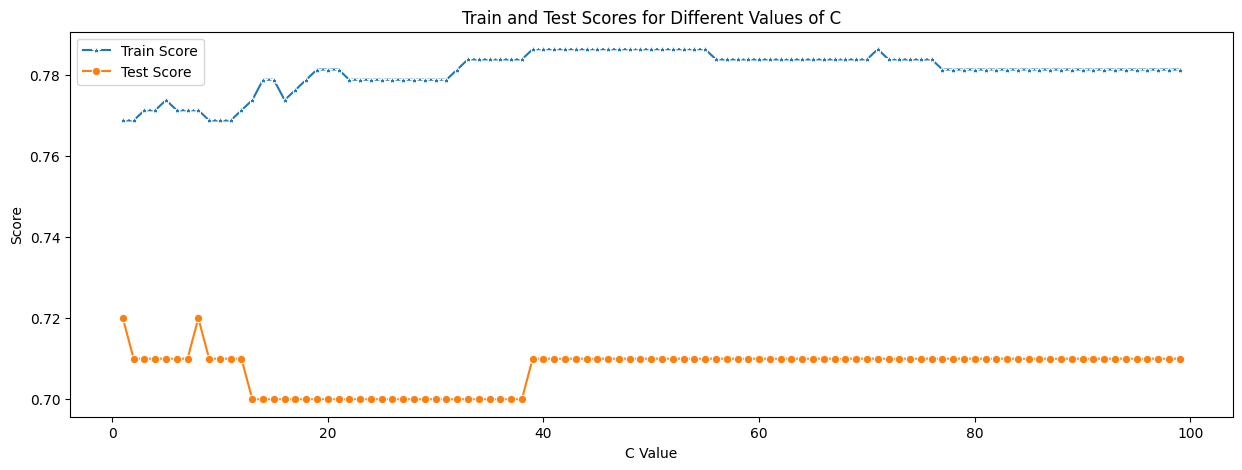

In [ ]:
test_score_list = []
train_score_list = []

for i in range(1,100):
    svm2 = SVC(C=i, kernel = 'rbf', gamma = 1, random_state = 21124026)
    svm2.fit(x_train, y_train)
    test_score_list.append(svm2.score(x_test, y_test))
    train_score_list.append(svm2.score(x_train, y_train))

plt.figure(figsize=(15,5))

# Plotting train scores
p = sns.lineplot(x=range(1,100), y=train_score_list, marker='*', label='Train Score')

# Plotting test scores
q = sns.lineplot(x=range(1,100), y=test_score_list, marker='o', label='Test Score')

plt.title("Train and Test Scores for Different Values of C")
plt.xlabel("C Value")
plt.ylabel("Score")
plt.legend()
plt.show()


In [ ]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns

def plot_svm_accuracy(kernel_type='poly', degree_range=range(1, 11), gamma_range=range(1, 11), C_value=1):
    """
    Function to plot SVM accuracy score with different kernels and polynomial degrees.

    Parameters:
    kernel_type (str): Type of kernel to use ('linear', 'poly', 'rbf', etc.)
    degree_range (range): Range of polynomial degrees (only used if kernel is 'poly')
    gamma_range (range): Range of gamma values (used only if kernel is 'rbf')
    C_value (float): The C parameter for the SVM
    """

    test_score_list = []
    train_score_list = []

    # Loop over the polynomial degree if kernel is 'poly', otherwise loop over gamma for 'rbf'
    if kernel_type == 'poly':
        for degree in degree_range:
            svm_model = SVC(kernel=kernel_type, degree=degree, C=C_value, random_state=21124026)
            svm_model.fit(x_train, y_train)
            test_score_list.append(svm_model.score(x_test, y_test))
            train_score_list.append(svm_model.score(x_train, y_train))
        x_values = degree_range
        xlabel = "Polynomial Degree"
    elif kernel_type == 'rbf':
        for gamma in gamma_range:
            svm_model = SVC(kernel=kernel_type, gamma=gamma, C=C_value, random_state=21124026)
            svm_model.fit(x_train, y_train)
            test_score_list.append(svm_model.score(x_test, y_test))
            train_score_list.append(svm_model.score(x_train, y_train))
        x_values = gamma_range
        xlabel = "Gamma Value"
    elif kernel_type == 'linear':
        svm_model = SVC(kernel=kernel_type, C=C_value, random_state=21124026)  # Linear kernel does not require degree or gamma
        svm_model.fit(x_train, y_train)
        test_score_list.append(svm_model.score(x_test, y_test))
        train_score_list.append(svm_model.score(x_train, y_train))
        x_values = [1]  # Only one point for linear kernel, no iteration
        xlabel = "Iterations"

    plt.figure(figsize=(15, 5))

    # Plotting train scores
    sns.lineplot(x=x_values, y=train_score_list, marker='*', label='Train Score')

    # Plotting test scores
    sns.lineplot(x=x_values, y=test_score_list, marker='o', label='Test Score')

    plt.title(f"Train and Test Scores for {kernel_type.capitalize()} Kernel" +
              (f" with Polynomial Degrees" if kernel_type == 'poly' else ""))
    plt.xlabel(xlabel)
    plt.ylabel("Score")
    plt.legend()
    plt.show()




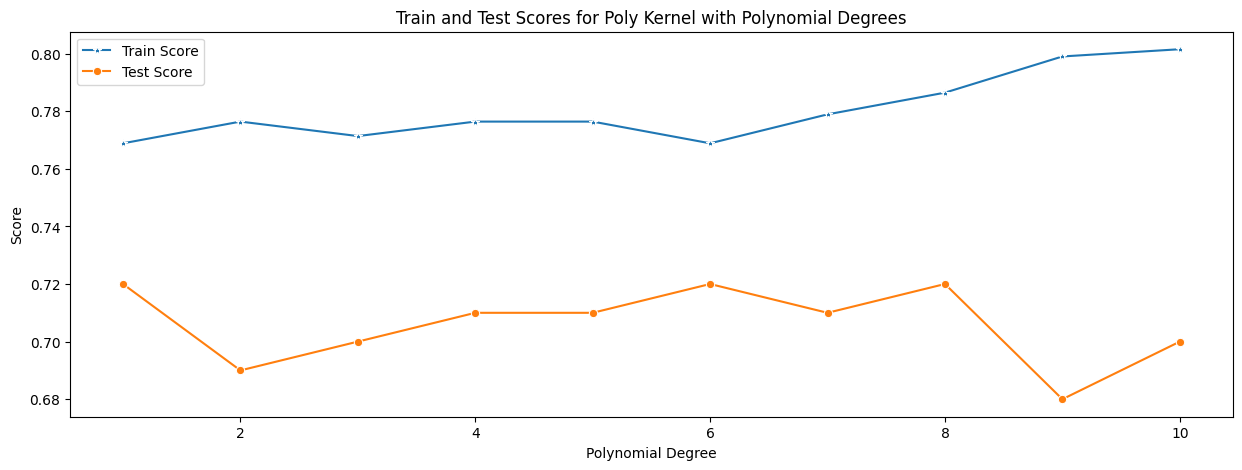

In [ ]:
# Example usage for polynomial kernel
plot_svm_accuracy(kernel_type='poly', degree_range=range(1, 11), C_value=1)



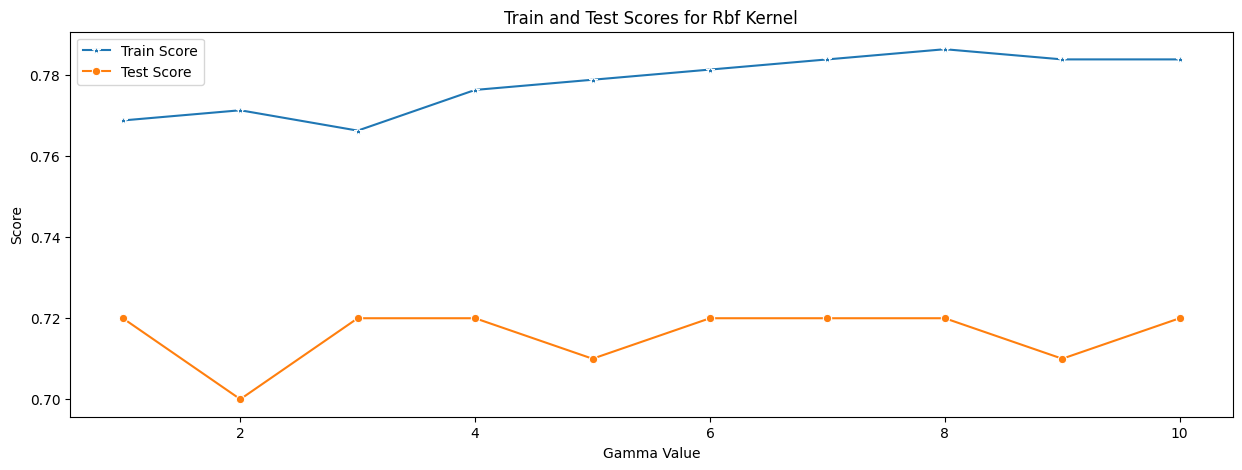

In [ ]:
# Example usage for RBF kernel with different gamma values
plot_svm_accuracy(kernel_type='rbf', gamma_range=range(1, 11), C_value=1)

In [ ]:
svm_rbf = SVC(C = 1, kernel="rbf", gamma = 1)
svm_rbf.fit(x_train, y_train)
evaluate_model(svm_rbf)


Train accuracy: 76.88%
Test accuracy: 72.00%
Test2 accuracy: 70.77%


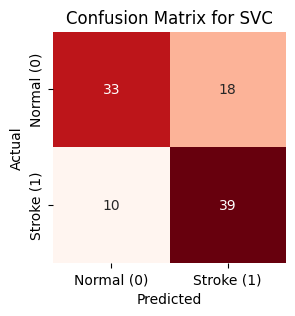

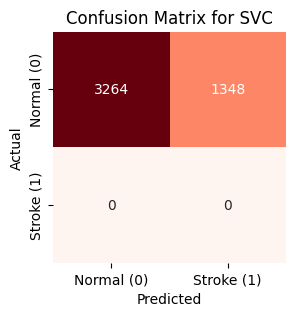

In [ ]:
plot_confusion_matrix(svm_rbf)
plot_confusion_matrix(svm_rbf, x_test=x_test2, y_test=y_test2)


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)
evaluate_model(rf_model)

Train accuracy: 100.00%
Test accuracy: 69.00%
Test2 accuracy: 72.16%


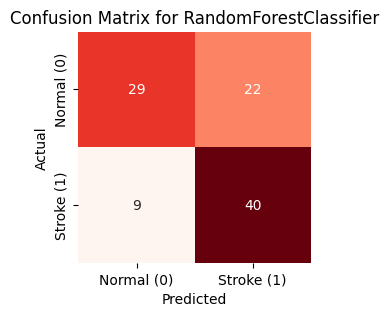

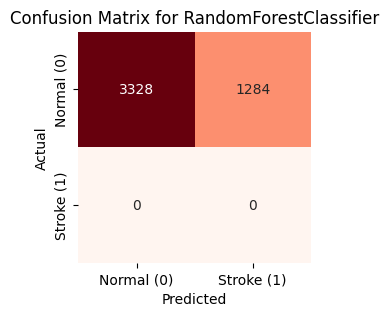

In [ ]:
plot_confusion_matrix(rf_model)
plot_confusion_matrix(rf_model, x_test=x_test2, y_test=y_test2)